In [3]:
import pandas as pd

df = pd.read_table('https://raw.githubusercontent.com/ronaldolagepessoa/data_science/master/dados/timeline.csv',sep=',')
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


### Transformando 'month' em datetime

In [9]:
df.month = pd.to_datetime(df.month)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


### Colocando a coluna 'month' como index

In [13]:
df.set_index('month', inplace=True)

KeyError: "None of ['month'] are in the columns"

In [14]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


### DatetimeIndex
Exitem classificações para tipos de índices nos Pandas Dataframe, o estado normal de um índice é "RangeIndex". Quando reseta-se o index com colunas deste tipo como índex ele assume o tipo de index "DatetimeIndex" usada em séries temporais 

<AxesSubplot:xlabel='month'>

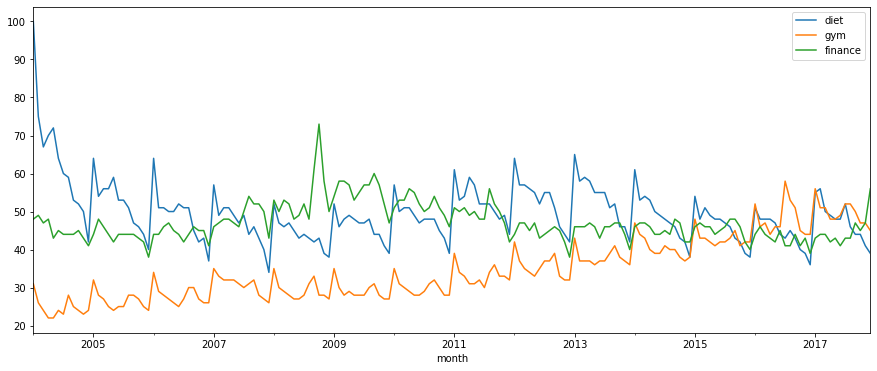

In [16]:
df.plot(figsize = (15,6))

## Análise de Séries Temporais
No gráfico acima temos três séries temporais de três fatores diferentes, para analisar ums série temporal precisamos analisar três caracterpisticas diferentes:

#### Tendência:
Na tendência eliminamos os ruídos, os "bicos" do gráfico bem como os intervalos entre picos e vales (sazonalidade), apenas para analisar o comportamento do gráfico em relação a crescimento e decrescimento da curva

#### Sazonalidade: 
Na sazonalidade, analisamos o pradrão de repetições de um mesmo comportamento ao logo do tempo, basicamente o gráfico tem os ruídos ("tremores") da curva e tendência (subidas e descidas)da curva eliminados e são analisados somente os intervalos entre picos e vales. De acordo com as datas do gráfico podemos explicar seu comportamento e suas possíveis causas de ocorrências de seus picos e vales.

#### Aleatoriedade:
Aleatoriedade nada mais é que um dos padrões de uma série temporal na qual o gráfico não pode ser explicado matematicamente por meio de equações, isto é, não possui um padrão ou comportamento que o permita a tal. São ruídos que não estão presentes na tendência e nem na sazonalidade.

#### Tendência:
Uma forma simples de analisar a tendência, além da função "trend" do módulo "statsmodel", há também uma forma de analisar pela média móvel diretamente. Vamos fazer esta análise com a curva de "diet"

#### Curva Diet:

<AxesSubplot:xlabel='month'>

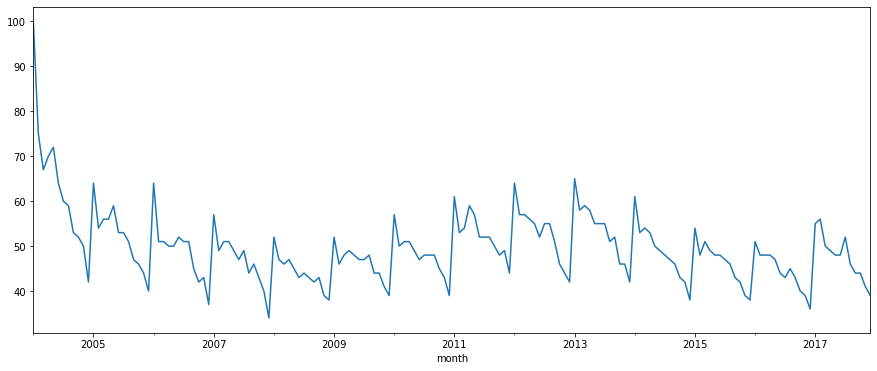

In [18]:
df.diet.plot(figsize = (15,6))

### Média Móvel - Análise Tendência
Podemos observar apenas a curva acompanhando crescimento e decrescimento do gráfico sem a presença da sazonalidade e de outras interferências.

Assim fica muito mais fácil perceber que a dieta estava em alta em 2004 mas houve uma queda acentuada até o fim de 2008 e à partir de 2009 apresentou um crescimento que se estabilizou em 2012 e asseim se manteve até 2014.

Basicamente a função "rolling" que é o mesmo que "móvel" com a função "mean()" disseram ao programa que era para calcular as médias dos anos e fazer uma linha com estas médias encontradas, diferente da Série temporal comum que pega os valores reais.

<AxesSubplot:xlabel='month'>

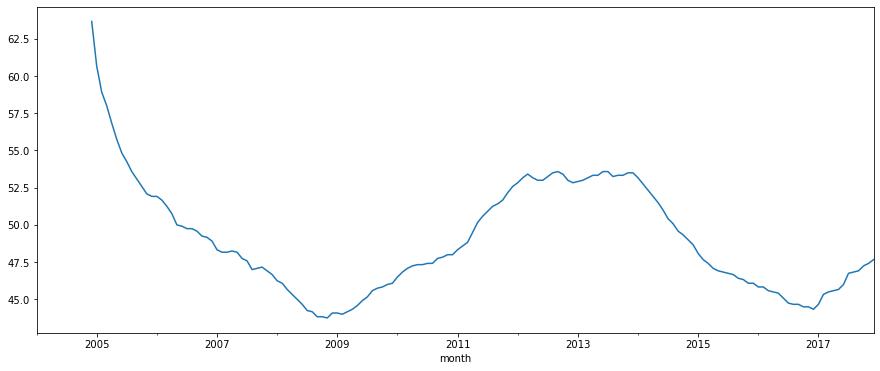

In [20]:
import matplotlib.pyplot as plt
df.diet.rolling(12).mean().plot(figsize = (15,6))

Uma outra alternativa é, ao invés de usar as MÉDIAS ou OS PRÓPRIOS VALORES, pode-se usar as somas dos valores de cada ano, com o objetivo de CONDENSAR o gráfico caso às vezes não esteja apresentando um comportamento desejável de Série temporal. Repare que a Série Temporal original trabalha com os valores mês a mês enquanto a curva se conecta de um ano ao ao outro.

Usando-se as somas, os valores de cada ano são somados e assim, desta forma, conecta-se aos outros como uma reta. Para isso contamos com a função "groupby" do Pandas 

#### Valores Somados: 

In [21]:
df.diet.groupby(df.index.year).sum()

month
2004    764
2005    623
2006    587
2007    560
2008    529
2009    553
2010    576
2011    631
2012    634
2013    642
2014    584
2015    553
2016    532
2017    572
Name: diet, dtype: int64

#### Gráfico dos valores somados:

<AxesSubplot:xlabel='month'>

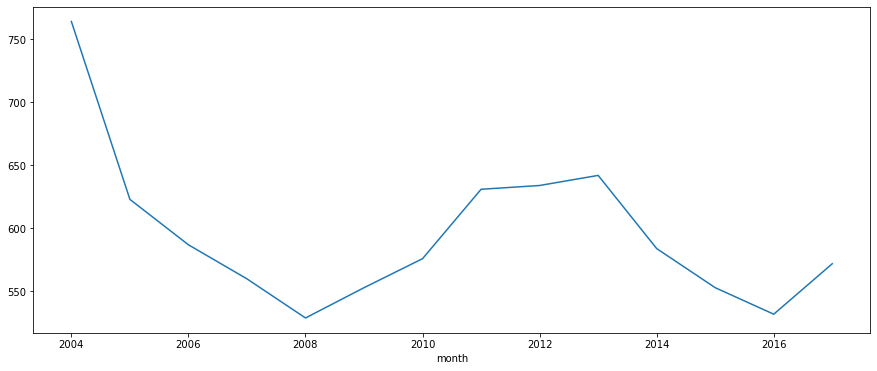

In [22]:
df.diet.groupby(df.index.year).sum().plot(figsize = (15, 6))

#### Sazonalidade (Eliminando Tendências)

No caso da Sazonalidade, eliminamos a TENDÊNCIA dos dados a fim de criar uma curva estacionária apenas para analisarmos as repetições de determinados padrões, ou seja, em determinadas épocas específicas de um ano podem repetir os mesmos eventos, daí a sazonalidade. 

O processo consiste em transformar uma série não estacionária em uma série estacionária. Tal transformação é possível com a subtração do valor do período atual com o valor do período anterior. Para isso usamos a função "Diff". Podemos observar os valores calculados subtraindo os atuais pelos anteriores e, com isso, temos números positivos e negativos. Positivos significam que o atual é maior que o anterior e portanto a taxa é positiva e o mesmo vale pelo contrário.

In [23]:
df.diet.diff()

month
2004-01-01     NaN
2004-02-01   -25.0
2004-03-01    -8.0
2004-04-01     3.0
2004-05-01     2.0
              ... 
2017-08-01    -6.0
2017-09-01    -2.0
2017-10-01     0.0
2017-11-01    -3.0
2017-12-01    -2.0
Name: diet, Length: 168, dtype: float64

#### Sazonalidade sem tendência:
Podemos observar neste gráfico que, todo início de ano há um pico na curva, o que significa que muito possivelmente as pessoas devem iniciar e levar a sério dietas, como uma forma de promessa de início de ano.

<AxesSubplot:xlabel='month'>

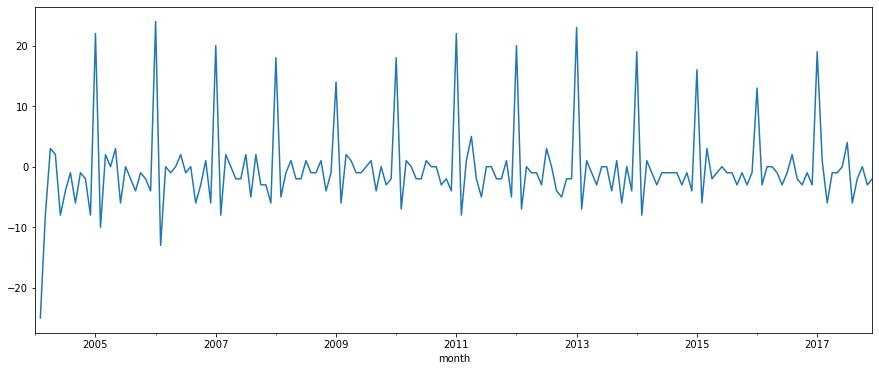

In [24]:
df.diet.diff().plot(figsize = (15,6))

Para colocar a visão do insight anterior mais clara, isto é, digamos que precisamos ampliar um trecho da imagem para enxergar mais de perto, usaremos um filtro para ver a visualização de 2006 a 2010 por exemplo.

Podemos observar que o gráfico tornou-se muito mais aproximado e podemos perceber com clareza os picos na virada de um ano para outro.

<AxesSubplot:xlabel='month'>

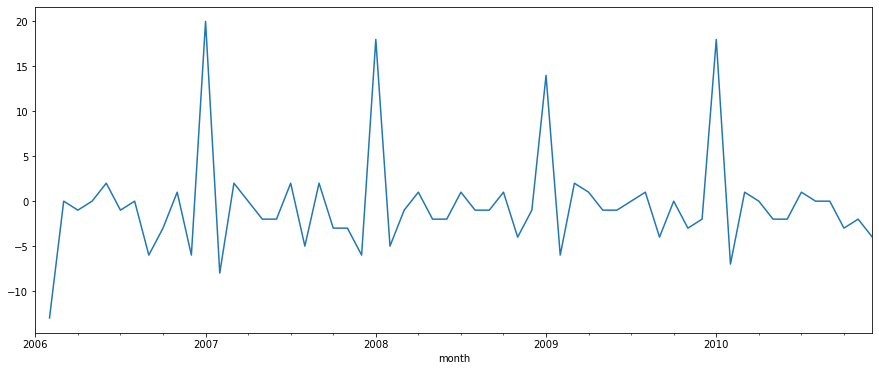

In [27]:
filtro = (df.index.year >= 2006) & (df.index.year <= 2010)
df[filtro].diet.diff().plot(figsize = (15,6))

<AxesSubplot:xlabel='month'>

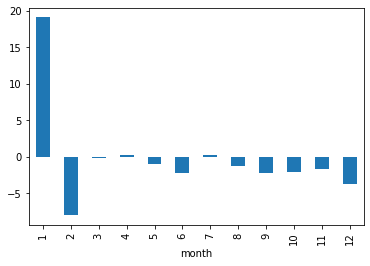

In [28]:
df.diet.diff().groupby(df.index.month).mean().plot(kind = 'bar')